# Data Availability Evaluation

The goal of the data availability research area is to investigate the long-term availability of the data needed for host behavioral profile computation across a large variety of hosts. The fact that there is no connection originating from the given host during the observation one hour is represented by an N/A value in the dataset. Hence, we analyze N/A values present in the dataset to explore data availability for host profile computation.

### Imports and definitions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress

from IPython.display import clear_output

%matplotlib inline

In [2]:
servers = [ipaddress.ip_network('133.250.178.0/24'), ipaddress.ip_network('133.250.163.0/24')]
workstations = [ipaddress.ip_network('133.250.146.0/24'), ipaddress.ip_network('133.250.157.128/25')]

In [3]:
def return_selected_columns(list_of_network_ranges, columns):
    """
    Returns list of the selected IP addresses from the list of the network ranges. 
    The goal is to be able to select the subset of the original dataset based on 
    the list of IP ranges
    """
    selected_columns = []
    for column in columns:
        column_ip_object = ipaddress.ip_address(column)
        for network_range in list_of_network_ranges:
            if column_ip_object in network_range:
                selected_columns.append(column)
    return(selected_columns)

def longest_sequence(series):
    max_length = 0
    counter = 0
    # Iterate over the series
    for item in series:
        # If nan, reset counters, update the max_length
        if np.isnan(item) :
            if max_length < counter:
                max_length = counter
            counter = 0
        # If not nan, update counter
        else:
            counter +=1
    # If there is no NaN or all NAN in the serie set max_length
    if max_length == 0:
        max_length = counter
    return(max_length)

### Load the dataset

In [4]:
print("This may take a while - approx 20 min - We suggest to use pickle for faster load")
file = '../dataset/Flows-anon.csv'
df = pd.read_csv(file, header=[0], index_col=[0])
df.index = pd.to_datetime(df.index)

#file = '../dataset/precomputed/Flows-anon.pkl'
#df = pd.read_pickle(file)

df.head()

This may take a while - approx 20 min - We suggest to use pickle for faster load


,133.250.0.0,133.250.0.1,133.250.0.2,133.250.0.3,133.250.0.4,133.250.0.5,133.250.0.6,133.250.0.7,133.250.0.8,133.250.0.9,...,133.250.255.246,133.250.255.247,133.250.255.248,133.250.255.249,133.250.255.250,133.250.255.251,133.250.255.252,133.250.255.253,133.250.255.254,133.250.255.255
2019-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,1.0,43.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,2.0,71.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number of observations that no IP not communicated at all

In [5]:
noncommunicative_obs = df[df.isnull().all(axis=1)].index
noncommunicative_obs = noncommunicative_obs.shape[0]
print("Noncommunicative Observations: ", noncommunicative_obs)
print("Percentage of totoal Observationss: ", noncommunicative_obs/df.shape[0]*100)

Noncommunicative Observations:  1329
Percentage of totoal Observationss:  15.17123287671233


### Number of IPs that have not communicated at all

In [6]:
noncommunicative_ips = df.columns[df.isnull().all()]
noncommunicative_ips = noncommunicative_ips.shape[0]
print("Noncommunicative IPs: ", noncommunicative_ips)
print("Percentage of totoal IPs: ", noncommunicative_ips/df.shape[1]*100)

Noncommunicative IPs:  703
Percentage of totoal IPs:  1.07269287109375


### Distribution of the number of missing observation over the whole network

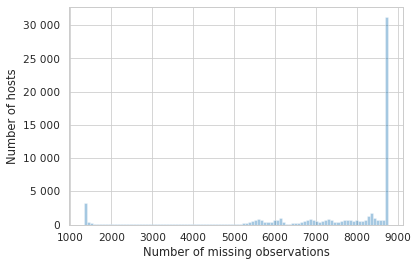

In [7]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2 )

# Plot the data
sns_plot = sns.distplot(df.isnull().sum(),bins=100,hist_kws={'cumulative': False}, kde=False)

# Adjust plot properties
sns_plot.set(ylabel = "Number of hosts", xlabel="Number of missing observations")
ylabels = ['{:,.0f}'.format(y).replace(',', ' ') for y in sns_plot.get_yticks()]
sns_plot.set_yticklabels(ylabels)

#sns_plot.figure.savefig('./fig/NA_distr_big.svg')
plt.show()

#### Zoomed view

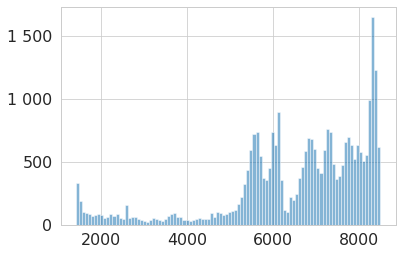

In [8]:
cutoff_value_max = df.isnull().sum().quantile(.50)
cutoff_value_min = df.isnull().sum().quantile(.05)

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8 )

# Select the IPs with total missing observations within the range
isnull = (df.isnull().sum() >= cutoff_value_max) | (df.isnull().sum() <= cutoff_value_min)

# Plot the data
sns_plot = sns.distplot(df.drop(isnull.index[isnull], axis=1).isnull().sum(), bins=100, kde=False, hist_kws={"alpha":0.55})

# Adjust plot properties
ylabels = ['{:,.0f}'.format(y).replace(',', ' ') for y in sns_plot.get_yticks()]
sns_plot.set_yticklabels(ylabels)

#sns_plot.figure.savefig('./fig/NA_distr_small.svg')
plt.show()

In [9]:
# Get the description of the distribution
df.isnull().sum().describe()

count    65536.000000
mean      7389.496277
std       2078.649240
min       1329.000000
25%       6747.000000
50%       8509.000000
75%       8750.000000
max       8760.000000
dtype: float64

### Longest sequence analysis

In [10]:
longest_seq = df.apply(longest_sequence)
longest_seq.head()

133.250.0.0    1
133.250.0.1    5
133.250.0.2    1
133.250.0.3    1
133.250.0.4    1
dtype: int64

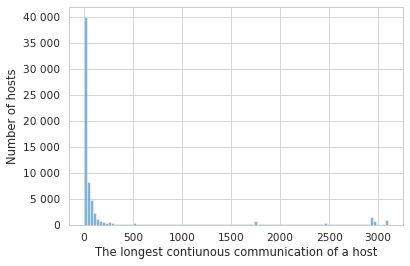

In [11]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2 )

# Plot data
sns_plot = sns.distplot(longest_seq, bins=100, kde=False, hist_kws={"alpha":0.55, 'cumulative': False})

# Adjust plot properties
sns_plot.set(ylabel = "Number of hosts", xlabel="The longest contiunous communication of a host")
ylabels = ['{:,.0f}'.format(y).replace(',', ' ') for y in sns_plot.get_yticks()]
sns_plot.set_yticklabels(ylabels)

# Show plot
#sns_plot.figure.savefig('./fig/longest_communication_serie_big.svg')
plt.show()

#### Zoomed view

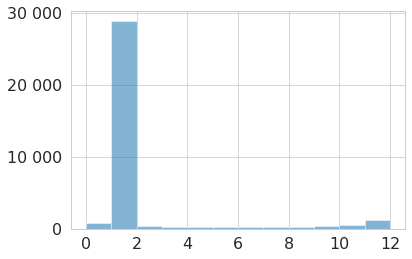

In [12]:
cutoff_value_max = longest_seq.quantile(.50)
cutoff_value_min = longest_seq.quantile(.00)

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8 )

# Plot data
sns_plot = sns.distplot(longest_seq[(longest_seq >= cutoff_value_min) & (longest_seq <= cutoff_value_max)], bins=12, kde=False, hist_kws={"alpha":0.55, 'cumulative': False})

# Adjust plot properties
#sns_plot.set(ylabel = "Number of hosts", xlabel="The longest contiunous communication of a host")
ylabels = ['{:,.0f}'.format(y).replace(',', ' ') for y in sns_plot.get_yticks()]
sns_plot.set_yticklabels(ylabels)

# Show plot
#sns_plot.figure.savefig('./fig/longest_communication_serie_small.svg')
plt.show()

In [13]:
print(longest_seq.describe(percentiles=np.arange(0,1,0.05).tolist()))

count    65536.000000
mean       249.274597
std        695.391426
min          0.000000
0%           0.000000
5%           1.000000
10%          1.000000
15%          1.000000
20%          1.000000
25%          1.000000
30%          1.000000
35%          1.000000
40%          1.000000
45%          1.000000
50%         12.000000
55%         17.000000
60%         29.000000
65%         41.000000
70%         53.000000
75%         68.000000
80%         90.000000
85%        151.000000
90%        511.000000
95%       2401.000000
max       3102.000000
dtype: float64


### Aggregation Impact

#### Whole network

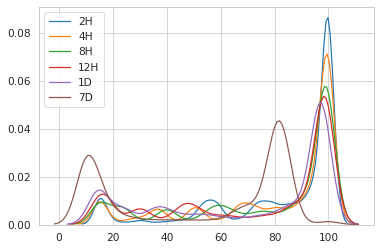

In [14]:
# Original 1 hour aggregation
null_count_percentage = df.isnull().sum()/df.shape[0]*100
all_mean={'1H':null_count_percentage.describe()['mean']}

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2 )

# Transforming to other aggregations
for aggregation in ['2H', '4H', '8H', '12H','1D', '7D']:
    clear_output(wait=True)
    print("Computing aggregation: %s" %(aggregation))
    
    # Group by aggregation
    grouped = df.groupby(pd.Grouper(freq=aggregation)).sum(min_count=1)
    
    # Compute the percentage of total observations
    null_count_percentage = grouped.isnull().sum()/grouped.shape[0]*100
    
    # Plot data
    sns.distplot(null_count_percentage, kde=True, hist=False, bins=20, label = aggregation)
    
    # Save means for comparison
    all_mean[aggregation] = null_count_percentage.describe()['mean']

    
# Plot data
clear_output(wait=True)
plt.legend()
plt.show() 

#### SUB_WORK segment

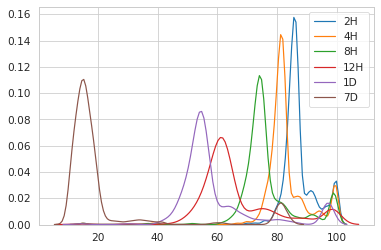

In [15]:
# Original 1 hour aggregation
null_count_percentage = df[return_selected_columns(workstations, df.columns)].isnull().sum()/df.shape[0]*100
work_mean={'1H':null_count_percentage.describe()['mean']}

# Transforming to other aggregations
for aggregation in ['2H', '4H', '8H', '12H','1D', '7D']:
    clear_output(wait=True)
    print("Computing aggregation: %s" %(aggregation))
    
    # Group by aggregation
    grouped = df[return_selected_columns(workstations, df.columns)].groupby(pd.Grouper(freq=aggregation)).sum(min_count=1)
    
    # Compute the percentage of total observations
    null_count_percentage = grouped.isnull().sum()/grouped.shape[0]*100

    # Plot data
    sns.distplot(null_count_percentage, kde=True, hist=False, bins=20, label = aggregation)
    
    # Save means for comparison 
    work_mean[aggregation] = null_count_percentage.describe()['mean']
    
# Plot data
clear_output(wait=True)
plt.legend()
plt.show() 

#### SUB_SRV segment

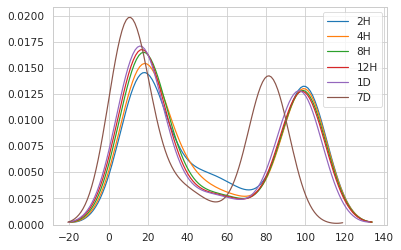

In [16]:
# Original 1 hour aggregation
null_count_percentage = df[return_selected_columns(servers, df.columns)].isnull().sum()/df.shape[0]*100
srv_mean={'1H':null_count_percentage.describe()['mean']}

# Transforming to other aggregations
for aggregation in ['2H', '4H', '8H', '12H','1D', '7D']:
    clear_output(wait=True)
    print("Computing aggregation: %s" %(aggregation))
    
    # Group by aggregation    
    grouped = df[return_selected_columns(servers, df.columns)].groupby(pd.Grouper(freq=aggregation)).sum(min_count=1)

    # Compute the percentage of total observations
    null_count_percentage = grouped.isnull().sum()/grouped.shape[0]*100
    
    # Plot data
    sns.distplot(null_count_percentage, kde=True, hist=False, bins=20, label = aggregation)
    
    # Save means for comparison 
    srv_mean[aggregation] = null_count_percentage.describe()['mean']

# Plot data
clear_output(wait=True)
plt.legend()
plt.show() 

#### Plot the aggregation impact

In [17]:
# Transform data for printing plot
df_all_mean = pd.DataFrame.from_dict(all_mean,orient='index')
df_all_mean = df_all_mean.reset_index()
df_all_mean = df_all_mean.reset_index()


df_work_mean = pd.DataFrame.from_dict(work_mean,orient='index')
df_work_mean = df_work_mean.reset_index()
df_work_mean = df_work_mean.reset_index()

df_srv_mean = pd.DataFrame.from_dict(srv_mean,orient='index')
df_srv_mean = df_srv_mean.reset_index()
df_srv_mean = df_srv_mean.reset_index()


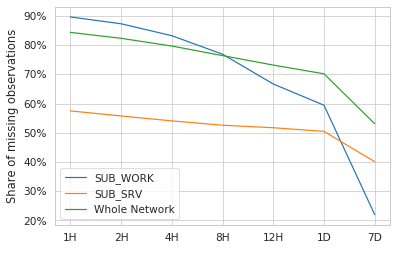

In [18]:
import matplotlib.ticker as mtick

# Plot data
sns_plot = sns.lineplot(x='level_0',y=0, data=df_work_mean, label="SUB_WORK")
sns_plot = sns.lineplot(x='level_0',y=0, data=df_srv_mean, label="SUB_SRV")
sns_plot = sns.lineplot(x='level_0',y=0, data=df_all_mean, label="Whole Network")

# Customize the plot
xlabels = [""] + [x for x in df_work_mean['index']]
sns_plot.set(ylabel = "Share of missing observations", xlabel=" ")
sns_plot.set_xticklabels(xlabels)
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='lower left')

#sns_plot.figure.savefig('./fig/NA_aggregation_impact.svg')
plt.show()

### Handling N/A values

#### No method

In [19]:
df.apply(np.mean).describe()

count    6.483300e+04
mean     2.741923e+02
std      9.232356e+03
min      1.000000e+00
25%      1.000000e+00
50%      8.252941e+00
75%      2.994087e+02
max      1.598708e+06
dtype: float64

#### Fill zeros

In [20]:
df.fillna(0).apply(np.mean).describe()

count    6.553600e+04
mean     1.033980e+02
std      5.668008e+03
min      0.000000e+00
25%      1.141553e-03
50%      7.962329e-01
75%      3.960308e+01
max      1.143153e+06
dtype: float64

#### Padding

In [21]:
df.fillna(method='pad', limit=4).apply(np.mean).describe()

count    6.483300e+04
mean     2.383395e+02
std      7.695550e+03
min      1.000000e+00
25%      1.000000e+00
50%      6.500000e+00
75%      2.519277e+02
max      1.347965e+06
dtype: float64

#### Interpolation

In [22]:
df.interpolate().apply(np.mean).describe()

count    6.483300e+04
mean     1.813886e+02
std      6.636614e+03
min      1.000000e+00
25%      1.000000e+00
50%      4.422185e+00
75%      1.708821e+02
max      1.345885e+06
dtype: float64